<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/Featue_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
new_data=data.drop(columns=['User ID','Gender'])
new_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
new_data.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

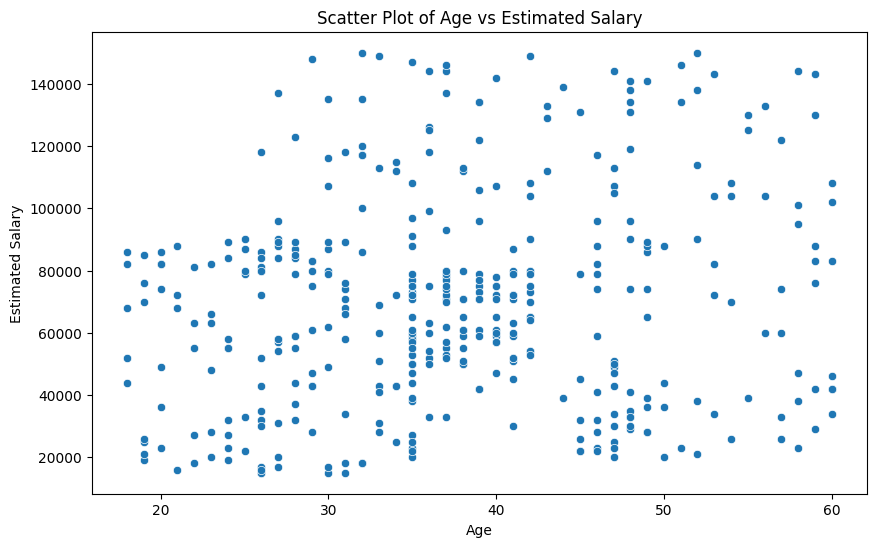

In [22]:
# prompt: plot a graph between age and salary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()
new_data=data.drop(columns=['User ID','Gender'])
new_data.head()
new_data.isnull().sum()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='EstimatedSalary',data=new_data)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Scatter Plot of Age vs Estimated Salary")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X=new_data.drop(columns=['Purchased'])
y=new_data['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model=Sequential()

In [13]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390 (1.52 KB)

 Trainable params: 390 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6643 - loss: 0.6870 - val_accuracy: 0.6500 - val_loss: 0.6715
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6449 - loss: 0.6700 - val_accuracy: 0.6500 - val_loss: 0.6594
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6218 - loss: 0.6658 - val_accuracy: 0.6500 - val_loss: 0.6521
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6377 - loss: 0.6563 - val_accuracy: 0.6500 - val_loss: 0.6488
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6440 - loss: 0.6516 - val_accuracy: 0.6500 - val_loss: 0.6478
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6380 - loss: 0.6549 - val_accuracy: 0.6500 - val_loss: 0.6477
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6368 - loss: 0.6553 - val_accuracy: 0.6500 - val_loss: 0.6475
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6497 - loss: 0.6478 - val_accuracy: 0.6500 - 

In [19]:
#predict
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)
#

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


-0.0001895427703857422